importing librariesm

In [1]:
import numpy as np #work with numpy arrays
import pandas as pd #work with dataframes
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #data visualisation


importing the dataset

In [2]:
df = pd.read_csv("zomato.csv")
df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.shape

(51717, 17)

In [4]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

Value_counts

In [6]:
df.name.value_counts()

Cafe Coffee Day             96
Onesta                      85
Just Bake                   73
Empire Restaurant           71
Five Star Chicken           70
                            ..
SeeYa Restaurant             1
Om Sai Dham Bombay Hotel     1
Milkshake Kulture            1
The Red Lantern              1
22S                          1
Name: name, Length: 8792, dtype: int64

In [7]:
df.name.unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ..., 'Nawabs Empire',
       'SeeYa Restaurant',
       'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...'],
      dtype=object)

In [8]:
df.book_table.value_counts()

No     45268
Yes     6449
Name: book_table, dtype: int64

In [9]:
df.online_order.value_counts()

Yes    30444
No     21273
Name: online_order, dtype: int64

In [10]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [11]:
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})

In [12]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [13]:
df.cost.value_counts()

300      7576
400      6562
500      4980
200      4857
600      3714
         ... 
560         1
60          1
469         1
3,700       1
5,000       1
Name: cost, Length: 70, dtype: int64

In [14]:
df.type.value_counts()

Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: type, dtype: int64

# EDA

In [15]:
#HANDLING MISSING VALUES

df.isnull().sum()

url                 0
address             0
name                0
online_order        0
book_table          0
rate             7775
votes               0
phone            1208
location           21
rest_type         227
dish_liked      28078
cuisines           45
cost              346
reviews_list        0
menu_item           0
type                0
city                0
dtype: int64

<AxesSubplot:>

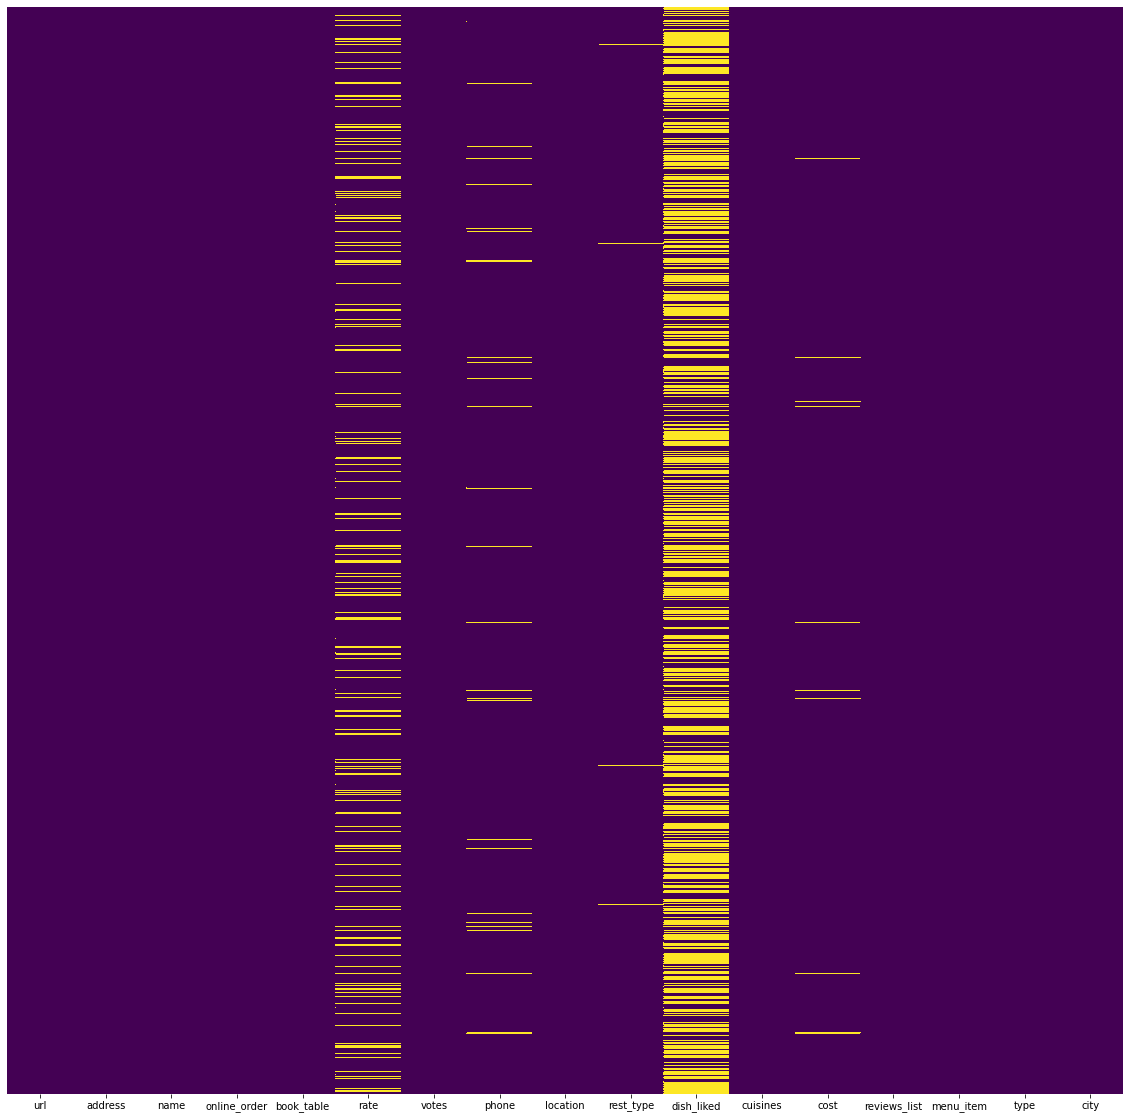

In [16]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False, cbar=False)

rate -> dependent varaible or target variable

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

url             0
address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
phone           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64

In [19]:
df = df.drop(['url','address','phone'],axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [20]:
df.shape

(23193, 14)

In [21]:
df.duplicated().sum()

11

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.duplicated().sum()

0

In [24]:
df.dtypes

name            object
online_order    object
book_table      object
rate            object
votes            int64
location        object
rest_type       object
dish_liked      object
cuisines        object
cost            object
reviews_list    object
menu_item       object
type            object
city            object
dtype: object

In [25]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [26]:
df['cost']=df['cost'].apply(lambda x: x.replace(',',''))
df['cost']=df['cost'].astype(float)

In [27]:
df['cost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1400.,
       1350., 2200., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

In [28]:
df.dtypes

name             object
online_order     object
book_table       object
rate             object
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [29]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [30]:
df = df.loc[df.rate!='NEW']

In [31]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [32]:
df['rate'] = df['rate'].apply(lambda x : x.replace('/5',''))

In [33]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [34]:
df['rate']=df['rate'].astype(float)

In [35]:
df.dtypes

name             object
online_order     object
book_table       object
rate            float64
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

# EDA

In [36]:
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

In [37]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [38]:
df.name.value_counts()

Onesta                             85
Empire Restaurant                  67
KFC                                59
McDonald's                         57
Pizza Hut                          56
                                   ..
Chopstick Kitchen                   1
Tuk-Tuk                             1
Baithak                             1
4700BC Popcorn                      1
OKO - The Lalit Ashok Bangalore     1
Name: name, Length: 3142, dtype: int64

# which restaurent has highest oulets in bangalore

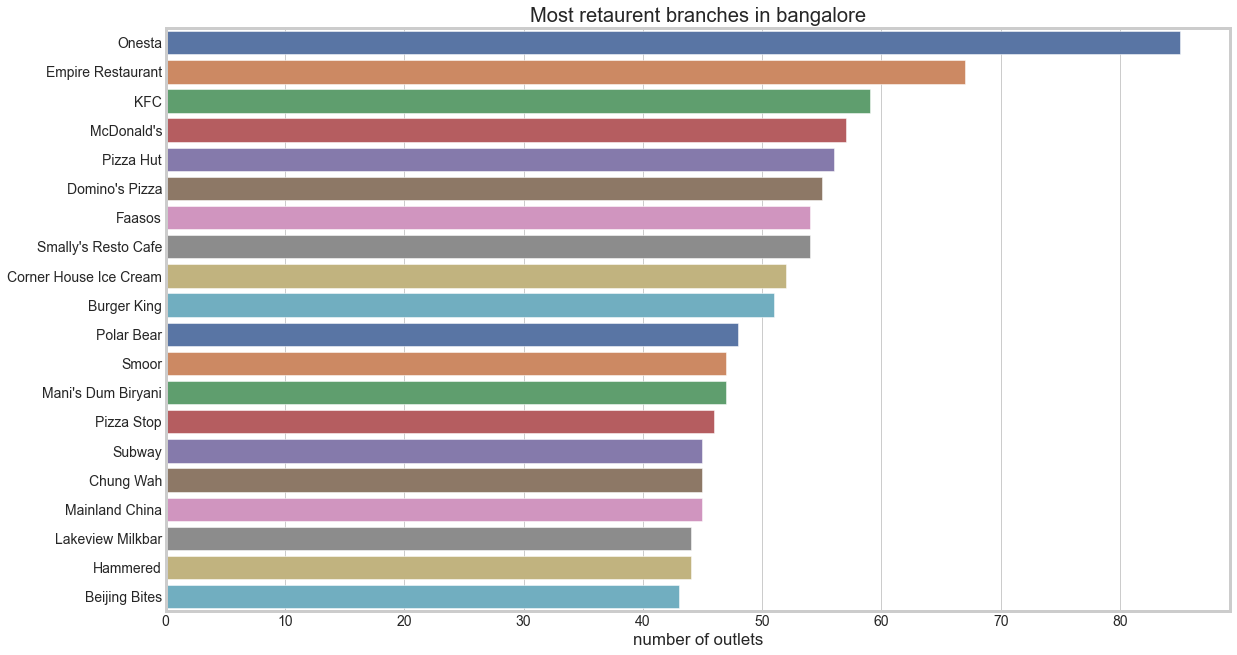

In [39]:
plt.figure(figsize=(17,10))
outlets = df['name'].value_counts()[:20]
sns.barplot(x=outlets,y=outlets.index, palette='deep')
plt.title('Most retaurent branches in bangalore')
plt.xlabel("number of outlets")
plt.show()

# How many of the restaurents accept online orders

In [40]:
df.online_order.value_counts()

Yes    16288
No      6747
Name: online_order, dtype: int64

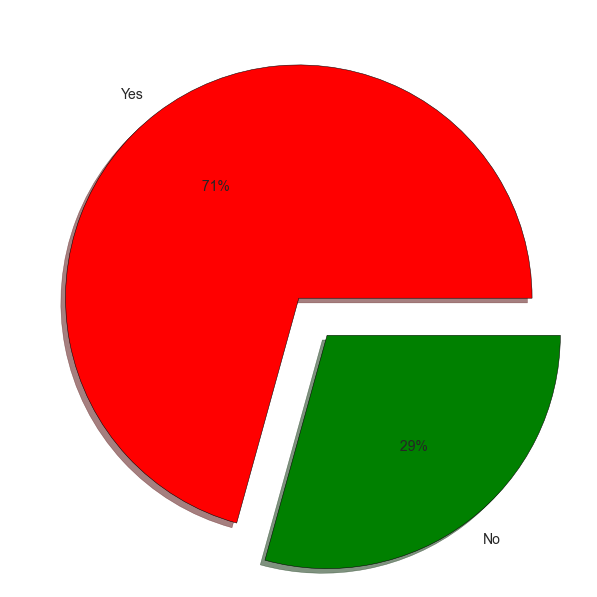

In [41]:
plt.figure(figsize=(10,10))
x = df.online_order.value_counts()
colors = ['red','green']
plt.pie(x,labels=x.index, colors=colors, autopct='% 1.0f%%',wedgeprops={'edgecolor':'black'}, 
        explode=[0,0.2], shadow=True )
plt.show()

# whether reaturent offering table booking or not

In [42]:
df.book_table.value_counts()

No     16998
Yes     6037
Name: book_table, dtype: int64

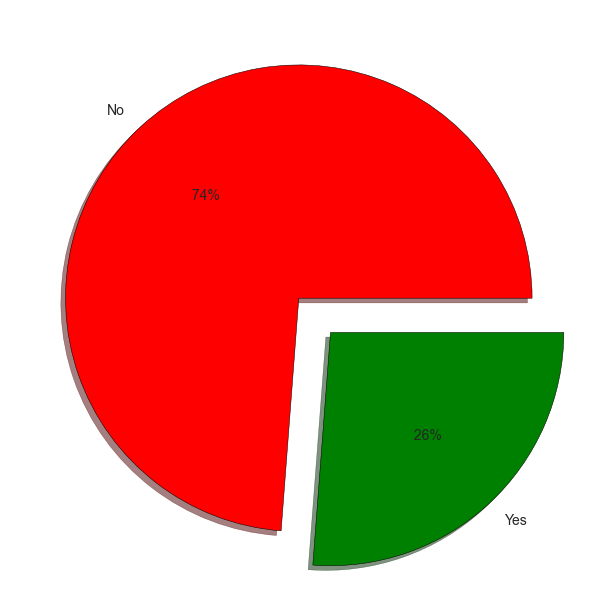

In [43]:
plt.figure(figsize=(10,10))
x = df.book_table.value_counts()
colors = ['red','green']
plt.pie(x,labels=x.index, colors=colors, autopct='% 1.0f%%',wedgeprops={'edgecolor':'black'}, 
        explode=[0,0.2], shadow=True )
plt.show()

## whether a reaturent deliver online or not

C:\Users\home pc\anaconda3\envs\tf_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='online_order', ylabel='count'>

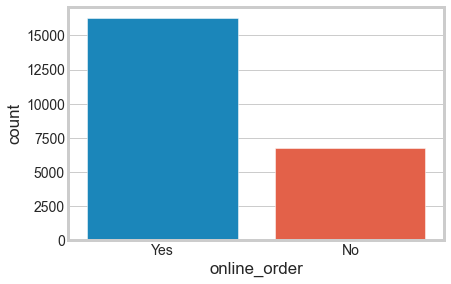

In [44]:
sns.countplot(df['online_order'])

## Rating distributions

C:\Users\home pc\anaconda3\envs\tf_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rate', ylabel='Density'>

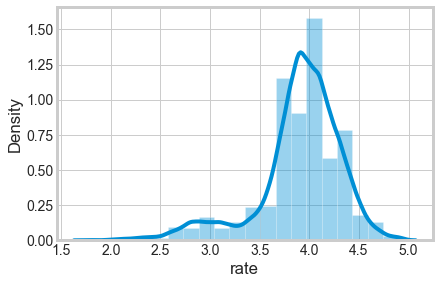

In [45]:
sns.distplot(df['rate'],bins=20)

C:\Users\home pc\anaconda3\envs\tf_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cost', ylabel='Density'>

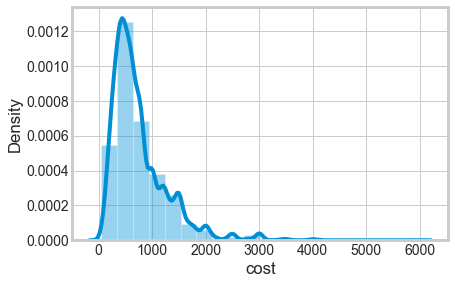

In [46]:
#distribution of cost for two people -> cost column
sns.distplot(df['cost'],bins=20)

<AxesSubplot:xlabel='cost'>

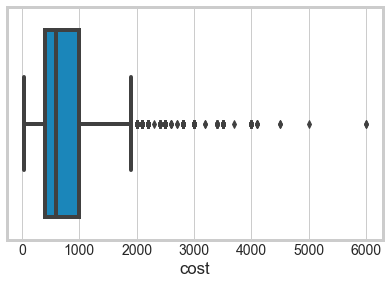

In [47]:
sns.boxplot(x='cost',data=df)

<AxesSubplot:ylabel='cost'>

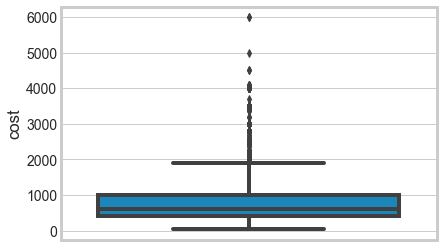

In [48]:
sns.boxplot(y='cost',data=df)

In [49]:
pd.options.display.max_rows = 4000

In [50]:
df.rest_type.value_counts()

Casual Dining                    7293
Quick Bites                      5221
Cafe                             2321
Dessert Parlor                   1074
Casual Dining, Bar                980
Delivery                          667
Bar                               357
Takeaway, Delivery                341
Bar, Casual Dining                328
Pub                               324
Fine Dining                       311
Casual Dining, Cafe               302
Lounge                            298
Food Court                        217
Pub, Casual Dining                217
Cafe, Casual Dining               159
Bakery                            157
Dessert Parlor, Cafe              143
Beverage Shop                     137
Beverage Shop, Quick Bites        134
Cafe, Bakery                      128
Casual Dining, Pub                124
Microbrewery, Casual Dining       121
Cafe, Dessert Parlor              107
Sweet Shop                        102
Bakery, Quick Bites                96
Sweet Shop, 

In [51]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [52]:
df.cuisines.nunique()

1677

In [53]:
df.cuisines.value_counts()

North Indian                                                                            1136
North Indian, Chinese                                                                    776
South Indian                                                                             359
Cafe                                                                                     273
South Indian, North Indian, Chinese                                                      233
Bakery, Desserts                                                                         215
Desserts, Beverages                                                                      214
Chinese                                                                                  210
Ice Cream, Desserts                                                                      208
Desserts                                                                                 204
Biryani                                                               

C:\Users\home pc\anaconda3\envs\tf_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'No. of reaturents')

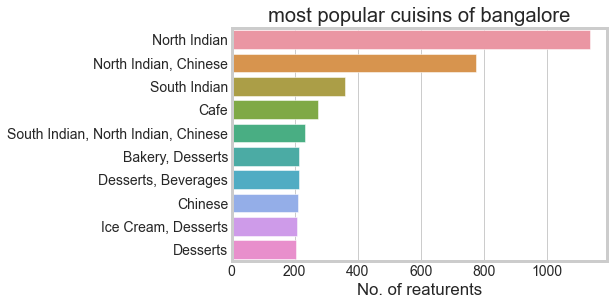

In [54]:
#top 10
x= df.cuisines.value_counts()[:10]
sns.barplot(x,x.index)
plt.title('most popular cuisins of bangalore')
plt.xlabel('No. of reaturents')

## rate- target varaibale

In [55]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [56]:
df['rate'].min()

1.8

In [57]:
df['rate'].max()

4.9

In [58]:
((df['rate']>=1) & (df['rate']<2)).sum()

5

In [59]:
((df['rate']>=2) & (df['rate']<3)).sum()

1169

In [60]:
((df['rate']>=3) & (df['rate']<4)).sum()

10118

In [61]:
(df['rate']>=4).sum()

11743

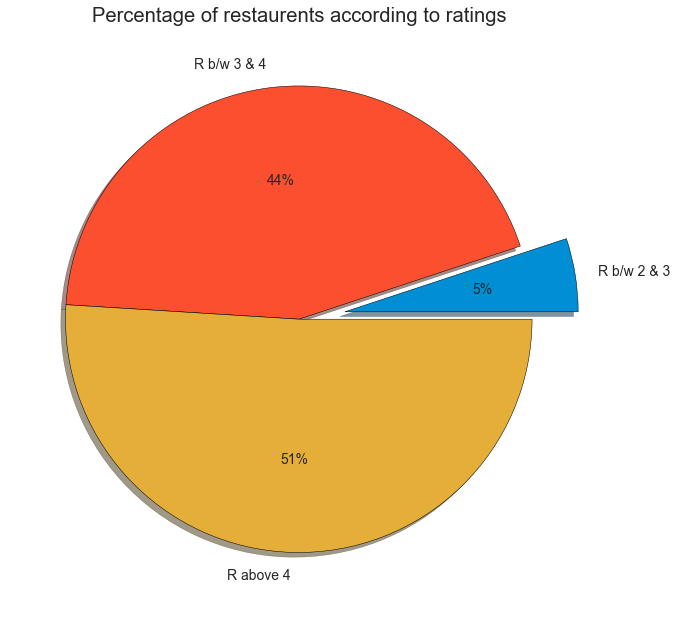

In [62]:
#plotting the rating count with pie chart
plt.figure(figsize=(10,10))
#data
slices=[((df['rate']>=2) & (df['rate']<3)).sum(),
        ((df['rate']>=3) & (df['rate']<4)).sum(),
        (df['rate']>=4).sum()]

labels = ['R b/w 2 & 3','R b/w 3 & 4','R above 4']

plt.pie(slices,labels=labels, autopct='%1.0f%%',wedgeprops={'edgecolor':'black'}, 
        explode=[0.2,0,0], shadow=True )
plt.title('Percentage of restaurents according to ratings')
plt.show()

In [63]:
df_freq = df.name.value_counts().to_dict()
df.name = df.name.map(df_freq)

In [64]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,11,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,4,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,11,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,2,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [65]:
df_freq1 = df.location.value_counts().to_dict()
df.location = df.location.map(df_freq1)

In [66]:
df_freq2 = df.rest_type.value_counts().to_dict()
df.rest_type = df.rest_type.map(df_freq2)

In [67]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,11,Yes,Yes,4.1,775,387,7293,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,4,Yes,No,4.1,787,387,7293,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,11,Yes,No,3.8,918,387,159,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,2,No,No,3.7,88,387,5221,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,No,No,3.8,166,286,7293,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [68]:
df_freq3 = df.cuisines.value_counts().to_dict()
df.cuisines = df.cuisines.map(df_freq3)

In [69]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,11,Yes,Yes,4.1,775,387,7293,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",50,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,4,Yes,No,4.1,787,387,7293,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",8,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,11,Yes,No,3.8,918,387,159,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",11,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,2,No,No,3.7,88,387,5221,Masala Dosa,72,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,No,No,3.8,166,286,7293,"Panipuri, Gol Gappe",4,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# label encoding on remaining columns

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le

LabelEncoder()

In [71]:
def Encode(df):
    for column in df.columns[~df.columns.isin(['rate','cost','votes','name','location','cuisines','rest_type'])]:
        df[column] = le.fit_transform(df[column])
    return df
    
df_en = Encode(df.copy())
        

In [72]:
df_en.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,11,1,1,4.1,775,387,7293,3573,50,800.0,6331,5004,0,1
1,4,1,0,4.1,787,387,7293,2902,8,800.0,7612,5004,0,1
2,11,1,0,3.8,918,387,159,1385,11,800.0,2107,5004,0,1
3,2,0,0,3.7,88,387,5221,2705,72,300.0,5162,5004,0,1
4,4,0,0,3.8,166,286,7293,3382,4,600.0,9698,5004,0,1


In [73]:
#feature importance

df_en.corr()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
name,1.000000,0.138138,0.016703,0.108762,0.209757,0.029204,-0.103680,-0.056291,-0.070914,-0.022324,0.009496,-0.086660,-0.043866,0.008360
online_order,0.138138,1.000000,-0.140290,-0.039057,-0.080420,0.056731,0.169146,0.038505,0.024571,-0.295755,-0.052987,-0.341583,-0.236983,-0.051674
book_table,0.016703,-0.140290,1.000000,0.358226,0.326381,0.028130,-0.101034,-0.001851,-0.079115,0.604837,0.071764,0.086260,0.137851,0.034144
rate,0.108762,-0.039057,0.358226,1.000000,0.382126,0.097457,-0.224778,-0.002309,-0.150202,0.315255,0.296536,0.007205,0.043731,0.029738
votes,0.209757,-0.080420,0.326381,0.382126,1.000000,0.120905,-0.126552,-0.065962,-0.083371,0.310748,0.066614,0.030787,0.078882,0.026545
location,0.029204,0.056731,0.028130,0.097457,0.120905,1.000000,-0.012874,-0.007908,-0.031356,-0.072647,0.012015,-0.034325,-0.036727,-0.113772
rest_type,-0.103680,0.169146,-0.101034,-0.224778,-0.126552,-0.012874,1.000000,0.062521,0.134789,-0.176299,-0.051735,-0.001379,-0.092099,-0.035754
dish_liked,-0.056291,0.038505,-0.001851,-0.002309,-0.065962,-0.007908,0.062521,1.000000,0.015405,-0.012170,0.007709,-0.001812,-0.039428,-0.026768
cuisines,-0.070914,0.024571,-0.079115,-0.150202,-0.083371,-0.031356,0.134789,0.015405,1.000000,-0.118480,-0.017217,0.023765,-0.017880,-0.017254
cost,-0.022324,-0.295755,0.604837,0.315255,0.310748,-0.072647,-0.176299,-0.012170,-0.118480,1.000000,0.078784,0.129140,0.204007,0.071787


<AxesSubplot:>

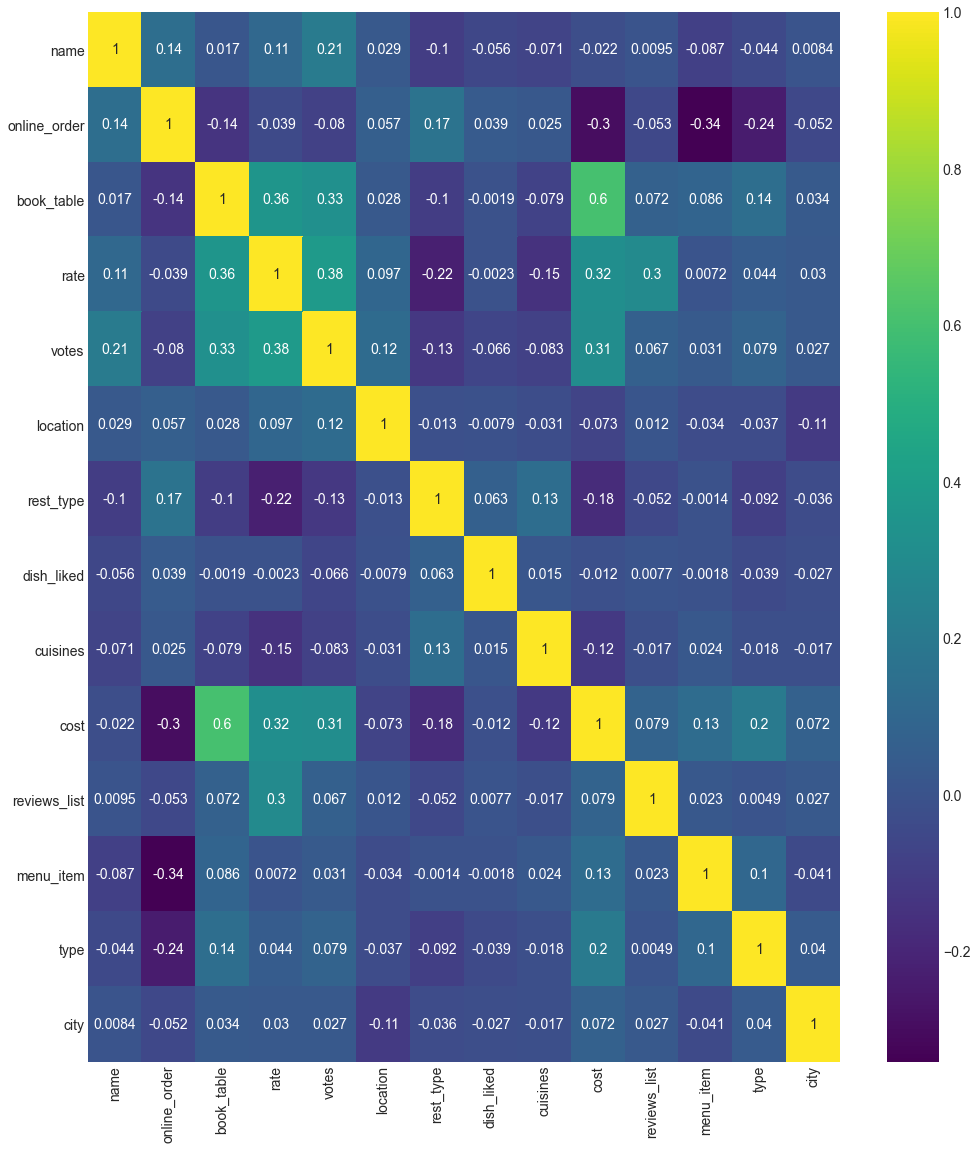

In [74]:
plt.figure(figsize=(15,18))
sns.heatmap(df_en.corr(),cmap='viridis', annot=True)

In [75]:
df_en.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,11,1,1,4.1,775,387,7293,3573,50,800.0,6331,5004,0,1
1,4,1,0,4.1,787,387,7293,2902,8,800.0,7612,5004,0,1
2,11,1,0,3.8,918,387,159,1385,11,800.0,2107,5004,0,1
3,2,0,0,3.7,88,387,5221,2705,72,300.0,5162,5004,0,1
4,4,0,0,3.8,166,286,7293,3382,4,600.0,9698,5004,0,1


In [76]:
df_en.shape

(23035, 14)

In [77]:
my_data = df_en.iloc[:,[0,1,2,3,4,5,6,8,9,11]]
my_data.to_csv('zomato_new.csv')

In [78]:
x = df_en.iloc[:,[0,1,2,4,5,6,8,9,11]]
x.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,11,1,1,775,387,7293,50,800.0,5004
1,4,1,0,787,387,7293,8,800.0,5004
2,11,1,0,918,387,159,11,800.0,5004
3,2,0,0,88,387,5221,72,300.0,5004
4,4,0,0,166,286,7293,4,600.0,5004


In [79]:
y = df_en['rate']
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51705    3.8
51707    3.9
51708    2.8
51711    2.5
51715    4.3
Name: rate, Length: 23035, dtype: float64

In [80]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [81]:
model.feature_importances_

array([0.13209322, 0.02746358, 0.12388253, 0.24653431, 0.12433395,
       0.08588988, 0.11975004, 0.12585389, 0.0141986 ])

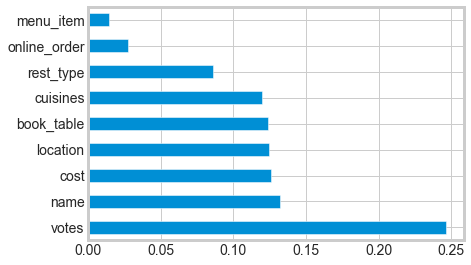

In [82]:
feat_imp = pd.Series(model.feature_importances_, index=x.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.show()

In [83]:
#spliting data trqain test split

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)


In [85]:
x_train

,name,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
23204,2,0,0,536,989,7293,59,950.0,5004
6223,10,0,1,91,443,128,10,1000.0,5004
45569,10,1,0,338,1334,302,125,800.0,1810
36645,11,1,0,85,717,5221,1136,400.0,5004
28270,11,1,0,206,1444,88,11,200.0,1645
...,...,...,...,...,...,...,...,...,...
21179,6,1,0,67,1030,5221,150,200.0,1449
16969,8,1,1,1884,1155,37,26,1500.0,5004
39719,38,1,0,78,22,7293,32,400.0,3216
16971,21,0,1,3573,1155,357,21,1000.0,5004


In [86]:
x_test

,name,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
47513,34,1,0,80,141,31,17,350.0,3227
14801,22,1,0,67,508,16,22,500.0,703
43838,5,0,1,888,443,311,9,3000.0,5004
48464,10,0,0,96,508,5221,150,500.0,5004
32266,6,1,0,391,466,341,82,500.0,5004
...,...,...,...,...,...,...,...,...,...
12898,14,1,0,55,304,5221,34,400.0,5004
36770,7,0,1,817,718,2321,7,800.0,5004
44907,3,1,0,74,1334,667,776,300.0,1115
323,8,1,0,91,1030,2321,13,300.0,5004


## Linear Regression

In [87]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [88]:
y_pred = lr.predict(x_test)

In [89]:
from sklearn.metrics import r2_score
r2_scoreLR=r2_score(y_test,y_pred)
r2_scoreLR

0.2465360257024054

## Support vector regression

In [90]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [91]:
y_pred = svr.predict(x_test)

In [92]:
r2_scoreSVR= r2_score(y_test,y_pred)

In [93]:
r2_scoreSVR

0.27611014500344133

## Random Forest Regressor

In [94]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=0.0001)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)


In [95]:
r2_scoreRFR = r2_score(y_test,y_pred)

In [96]:
r2_scoreRFR

0.8950231331772706

# Extra Tree Regression

In [97]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor(n_estimators = 120)
et.fit(x_train,y_train)

ExtraTreesRegressor(n_estimators=120)

In [98]:
y_pred = et.predict(x_test)


In [99]:
r2_scoreET = r2_score(y_test,y_pred)


In [100]:
r2_scoreET

0.9428595274403669

## SERIALIZATION OR PICKLING (SAVING THE MODEL)

In [101]:
#this will save our model locally to use further to deployment
import pickle
pickle.dump(et,open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))

# DEPLOYMENT

3 TYPES
1. MNC own servers -->application, data, security,os(they take care)

2. Iaas - Infra structure as a service -->AWS, AZURE, GOOGLE CLOUD
                                        

3.Paas - Platformas as a service --> Heroku, Flask


